# <font color=blue>Assignments for "Plotting Basic Charts With Matplotlib"</font>

In this assignment, you will continue work with the [Coronavirus Source Data](https://ourworldindata.org/coronavirus-source-data). You will plot different chart types. Don't forget to set titles and axis labels.

1. Plot a bar chart for total cases of the 20 countries that havebiggest numbers.

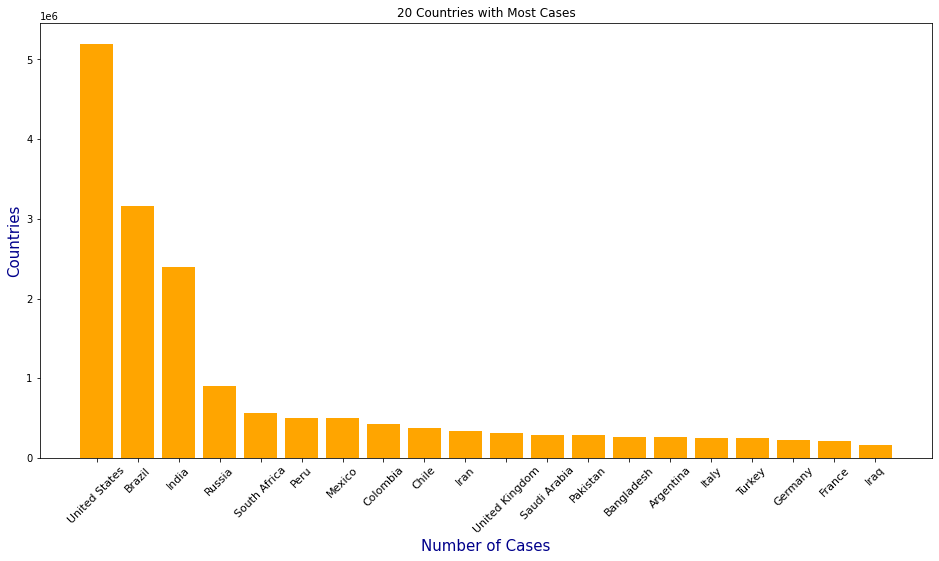

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 

warnings.filterwarnings('ignore')
title_style = {'family': 'Century Gothic', 'color': 'darkred', 'size': 20 }
axis_style  = {'family': 'Century Gothic', 'color': 'darkblue', 'size': 15 }

#getting df from memory
df = pd.read_csv('owid-covid-data.csv', parse_dates=["date"], low_memory=False)
#getting number of total cases for last recorded date at my db
bardf = df[(df['location'] != 'World')  & (df['date'] == '2020-08-13')]
#sorting df by total cases 
bardf = bardf.sort_values(by='total_cases', ascending=False)
#getting top 20 counry with total cases
bardf = bardf.head(20)

plt.figure(figsize=(16,8))
plt.bar(bardf['location'], bardf['total_cases'], color='orange')
plt.title('20 Countries with Most Cases')
plt.xticks(rotation=45, fontsize=11)
plt.xlabel('Number of Cases', fontdict = axis_style)
plt.ylabel('Countries', fontdict = axis_style)

plt.show()


2. Plot a histogram for daily deaths for any country you choose. Make three subplots for different bins.

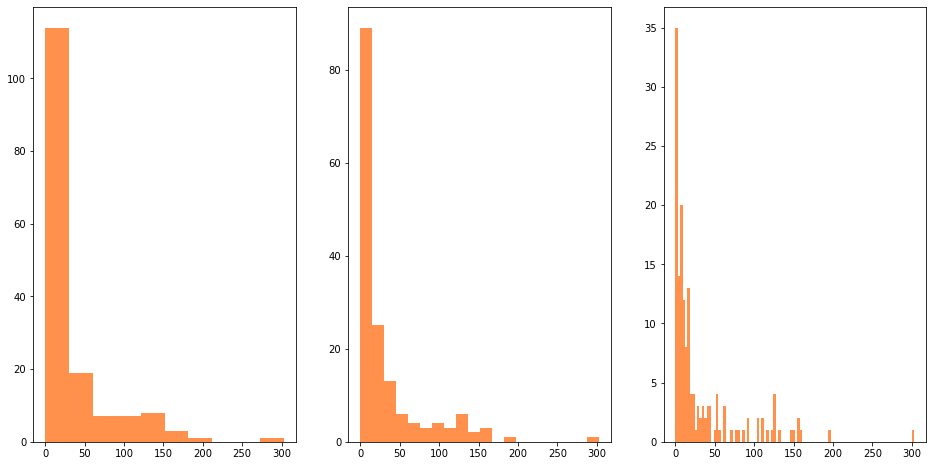

In [34]:
histdf = df[df['location'] == 'Argentina']

plt.figure(figsize=(16,8))
plt.subplot(1,3,1)
plt.hist(histdf['new_deaths'], color='#FF914D')

plt.subplot(1,3,2)
plt.hist(histdf['new_deaths'], bins=20, color='#FF914D')

plt.subplot(1,3,3)
plt.hist(histdf['new_deaths'], bins=100, color='#FF914D')

plt.show()

3. Plot a scatter plot of new cases and new death for Germany and France.

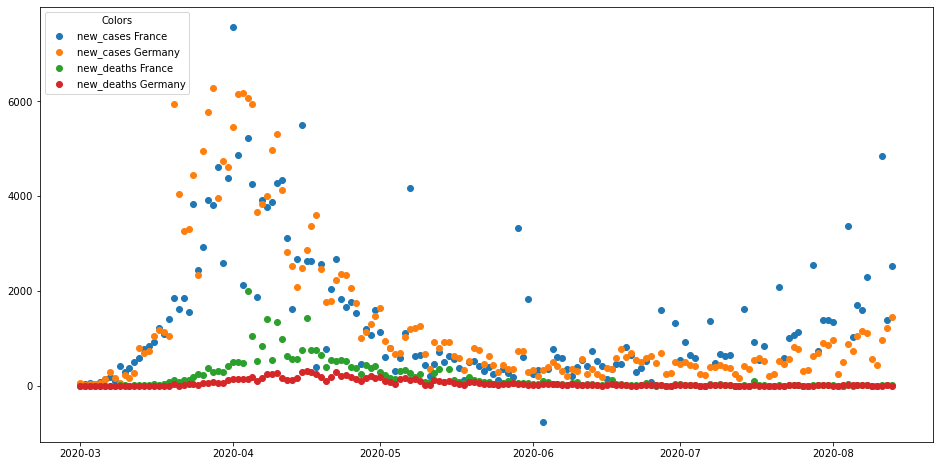

In [49]:
#figuresize
plt.figure(figsize=(16,8))

#starting from first cases of countries
scatterdf = df[df['date'] >= '2020-03-01']
#looping through columns
for st in ['new_cases', 'new_deaths']:
    #looping through countries
    for cnt in ['France', 'Germany']:
        x = scatterdf[scatterdf['location'] == cnt]
        y = x[st]
        plt.scatter(x['date'], y, label=st+" "+cnt)
plt.legend(loc=2, title='Colors')

4. Plot a boxplot for daily deaths for any country you choose.

Text(0, 0.5, 'Country')

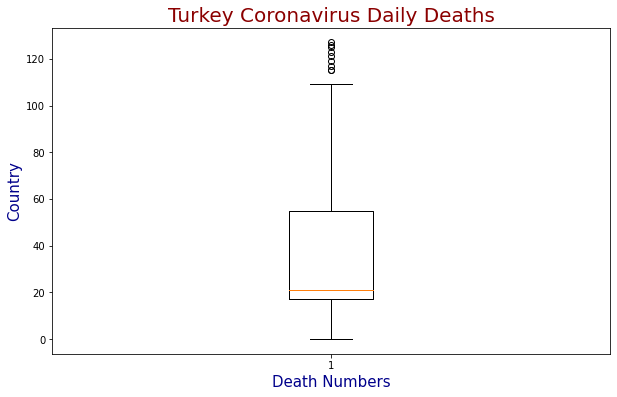

In [59]:
plt.figure(figsize=(10,6))
plt.title('Turkey Coronavirus Daily Deaths', fontdict=title_style)


boxdf = df[df['location'] == 'Turkey']

plt.boxplot(boxdf['new_deaths'].dropna())
plt.xlabel('Death Numbers', fontdict=axis_style)
plt.ylabel('Country', fontdict=axis_style)


5. Calculate the total case for each continent and plot a pie chart 

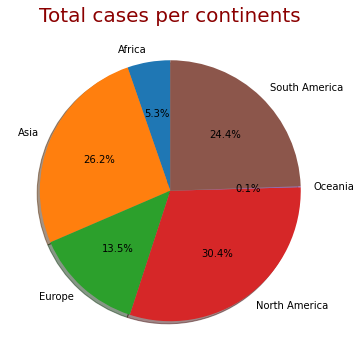

In [109]:
plt.figure(figsize=(10,6))
plt.title('Total cases per continents', fontdict=title_style)

piedf = df[df['date'] == '2020-08-13']
piedfdata = piedf.groupby('continent')['total_cases'].sum()
pielabels = piedfdata.keys()


plt.pie(piedfdata, labels=pielabels, shadow=True, autopct='%1.1f%%', startangle=90)
plt.show()